<a href="https://colab.research.google.com/github/Borowaa/Machine_learning_lecture/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Lab 3 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Note!
Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/00_cheatsheet.ipynb)

# Task 3.1
_Get mnist data_

```python
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
```
_Train simple model:_
- Inspect dataset
- Train binary Binary Classifier 5 or not 5 with SGDClassifier
- Measure Accuracy Using Cross-Validation

_Type your code below_

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
#Importujemy funkcję fetch_openml ze sklearn i pobieramy zbiór MNIST (obrazy cyfr pisanych odręcznie). Dane zapisują się w obiekcie mnist.

In [ ]:
X, y = mnist["data"], mnist["target"]
print("Kształt X:", X.shape)
print("Kształt y:", y.shape)
print("Przykładowe etykiety:", y[:10])
#X – macierz cech (obrazy spłaszczone do 784 pikseli).
#y – wektor etykiet (cyfry 0–9 w postaci stringów).
#Wypisujemy rozmiar danych i kilka pierwszych etykiet, żeby zobaczyć, jak wyglądają.

Kształt X: (70000, 784)
Kształt y: (70000,)
Przykładowe etykiety: ['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


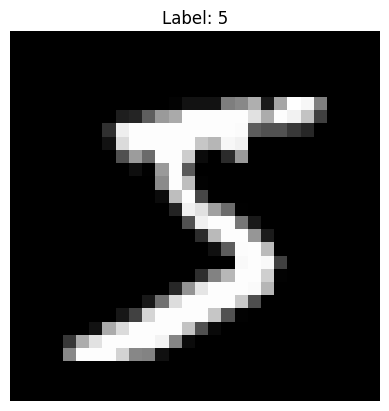

In [ ]:
import matplotlib.pyplot as plt

sample = X[0].reshape(28, 28)
plt.imshow(sample, cmap="gray")
plt.title(f"Label: {y[0]}")
plt.axis("off")
plt.show()
#Bierzemy pierwszy przykład z danych (X[0]) i zmieniamy kształt na 28x28 pikseli.
#Wyświetlamy go jako obraz w odcieniach szarości i w tytule pokazujemy jego prawdziwą etykietę.

In [ ]:
import numpy as np

y_binary = (y == '5')  # True jeśli 5, False w innym przypadku
print(np.unique(y_binary, return_counts=True))
#Tworzymy nowy wektor y_binary, który przyjmuje wartości:
#True jeśli obraz przedstawia cyfrę 5,
#False dla każdej innej cyfry.
#Wypisujemy, ile jest przykładów klasy „5” i ile „nie 5”, żeby zobaczyć, czy dane są zrównoważone

(array([False,  True]), array([63687,  6313]))


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y_binary)

#Tworzymy obiekt klasyfikatora liniowego SGDClassifier, który uczy się metodą stochastycznego spadku gradientowego.
#Uczymy model, żeby rozróżniał „5” od „nie 5” na podstawie całego zbioru treningowego (X, y_binary).

SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X, y_binary, cv=3, scoring="accuracy")
print("Accuracy (cross-validation):")
print(scores)
print("Średnia:", scores.mean())
#Używamy cross_val_score, żeby wykonać 3-krotną walidację krzyżową (cv=3).
#W każdym „foldzie” model jest trenowany na części danych i testowany na pozostałej części.
#Wypisujemy accuracy z każdego folda oraz średnią dokładność – to nam mówi, jak dobrze model rozpoznaje „5” vs „nie 5”.

Accuracy (cross-validation):
[0.96794377 0.94797069 0.96194231]
Średnia: 0.9592855905973937


# Task 3.2
_Check model results_
- Check Confusion Matrix
- Get Precision,  Recall and f1 score
_Check Precision/Recall Trade-off_
- Experiment with different threshold values
- Calculate precision-recall curve and make precision-recall plot
- Calculate ROC curve and make ROC curve plot
- Calcuate ROC AUC score

_Type your code below_

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# przewidywania w walidacji krzyżowej
y_pred_cv = cross_val_predict(sgd_clf, X, y_binary, cv=3)

cm = confusion_matrix(y_binary, y_pred_cv)
print("Confusion matrix:")
print(cm)

# Podsumowanie:
# - Używamy cross_val_predict, żeby uzyskać przewidywania modelu w walidacji krzyżowej.
# - confusion_matrix(y_true, y_pred) zwraca macierz:
#   [[TN FP]
#    [FN TP]]
#   gdzie pozytywna klasa to "5".
# - Macierz pokazuje, ile było poprawnych/niepoprawnych klasyfikacji.


Confusion matrix:
[[61910  1777]
 [ 1073  5240]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_binary, y_pred_cv)
recall = recall_score(y_binary, y_pred_cv)
f1 = f1_score(y_binary, y_pred_cv)

print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

# Podsumowanie:
# - Precision: z wszystkich przykładów przewidzianych jako "5"
#   ile faktycznie było "5".
# - Recall: z wszystkich prawdziwych "5"
#   ile model poprawnie wykrył.
# - F1-score: średnia harmoniczna precision i recall (kompromis między nimi).


Precision: 0.7467578737352145
Recall   : 0.8300332646919056
F1-score : 0.7861965491372843


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Wyniki decision_function w walidacji krzyżowej (ciągłe wartości, nie 0/1)
y_scores = cross_val_predict(sgd_clf, X, y_binary, cv=3, method="decision_function")

# Sprawdzimy kilka progów
thresholds = [-5, 0, 5, 10]

for t in thresholds:
    y_pred_t = (y_scores > t)
    p = precision_score(y_binary, y_pred_t)
    r = recall_score(y_binary, y_pred_t)
    print(f"Threshold {t:>3}: precision = {p:.3f}, recall = {r:.3f}")

# Podsumowanie:
# - decision_function zwraca wynik "pewności" modelu (im większy, tym bardziej "5").
# - Zmieniamy próg (threshold), powyżej którego uznajemy przykład za "5".
# - Wyższy próg zwykle zwiększa precision, ale zmniejsza recall;
#   niższy próg robi odwrotnie (trade-off precision/recall).


Threshold  -5: precision = 0.746, recall = 0.830
Threshold   0: precision = 0.747, recall = 0.830
Threshold   5: precision = 0.747, recall = 0.830
Threshold  10: precision = 0.747, recall = 0.829


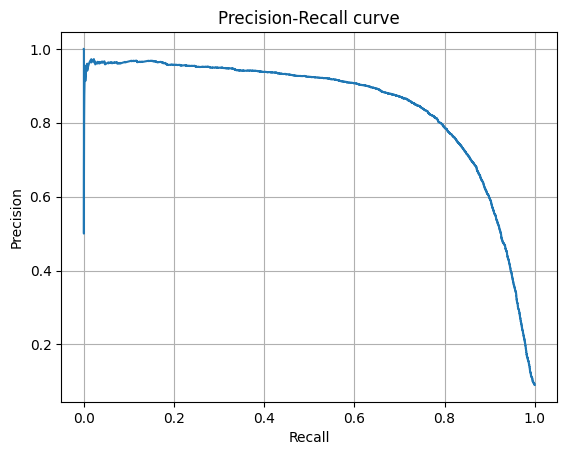

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, pr_thresholds = precision_recall_curve(y_binary, y_scores)

plt.figure()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.grid(True)
plt.show()

# Podsumowanie:
# - precision_recall_curve zwraca wektory precision i recall dla różnych progów.
# - Na wykresie oś X to recall, a oś Y to precision.
# - Krzywa pokazuje, jak zmienia się precision i recall
#   przy przesuwaniu progu decyzji (threshold).


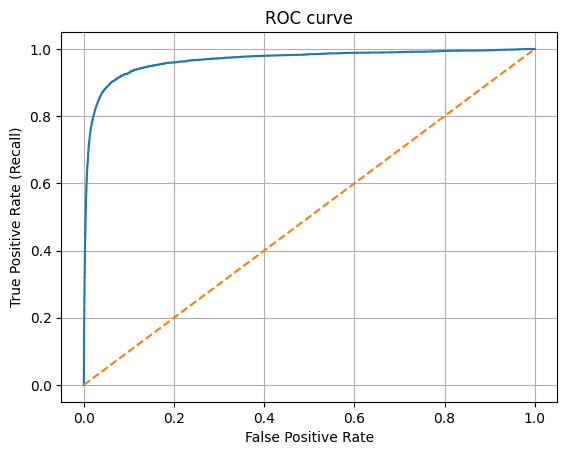

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, roc_thresholds = roc_curve(y_binary, y_scores)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")  # linia losowego klasyfikatora
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC curve")
plt.grid(True)
plt.show()

# Podsumowanie:
# - roc_curve zwraca FPR (False Positive Rate) i TPR (True Positive Rate)
#   dla różnych progów.
# - Wykres ROC pokazuje, jak rośnie TPR, gdy dopuszczamy większy FPR.
# - Linia przerywana to losowy klasyfikator; dobry model powinien
#   leżeć wyraźnie powyżej tej linii.


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_binary, y_scores)
print("ROC AUC:", roc_auc)

# Podsumowanie:
# - roc_auc_score liczy pole pod krzywą ROC (AUC = Area Under Curve).
# - Wartość 0.5 oznacza losowy model, 1.0 oznacza idealny.
# - Im wyższy ROC AUC, tym lepsza zdolność modelu do odróżniania
#   klasy pozytywnej ("5") od negatywnej ("nie 5").


ROC AUC: 0.966907458229373


# Task 3.3
_Compare 2 models_
- Train binary Binary Classifier 5 or not 5 with RandomForestClassifier
- Compare results of  RandomForestClassifier with SGDClassifier usign precision-recall curve plot

_Type your code below_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# score'y SGD (dla porównania) - decision_function
sgd_scores = cross_val_predict(
    sgd_clf, X, y_binary, cv=3, method="decision_function"
)

# score'y Random Forest - prawdopodobieństwo klasy pozytywnej ("5")
rf_proba = cross_val_predict(
    rf_clf, X, y_binary, cv=3, method="predict_proba"
)
rf_scores = rf_proba[:, 1]  # kolumna z prawdopodobieństwem klasy 1 (True)

# Podsumowanie:
# - Tworzymy RandomForestClassifier z 100 drzewami.
# - Za pomocą cross_val_predict pobieramy:
#   * sgd_scores: ciągłe wartości z decision_function dla SGD.
#   * rf_scores: prawdopodobieństwa bycia "5" (klasa pozytywna) dla Random Forest.
# - Nie używamy tu .predict(), tylko "score'y", żeby móc narysować krzywe precision-recall.


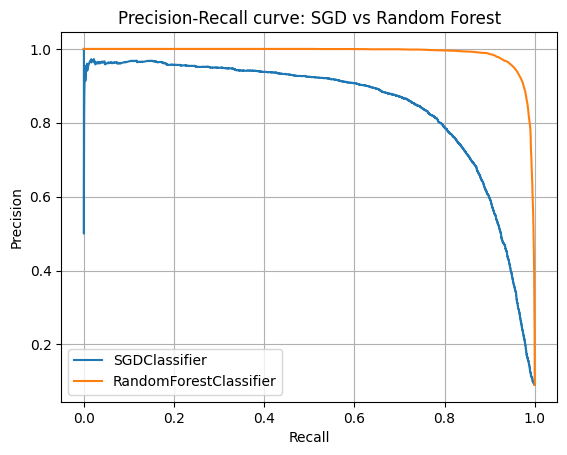

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

sgd_precisions, sgd_recalls, _ = precision_recall_curve(y_binary, sgd_scores)
rf_precisions, rf_recalls, _ = precision_recall_curve(y_binary, rf_scores)

plt.figure()
plt.plot(sgd_recalls, sgd_precisions, label="SGDClassifier")
plt.plot(rf_recalls, rf_precisions, label="RandomForestClassifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve: SGD vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# Podsumowanie:
# - precision_recall_curve liczy precision i recall dla wielu progów
#   na podstawie "score'ów" modelu.
# - Rysujemy na jednym wykresie dwie krzywe:
#   * dla SGDClassifier,
#   * dla RandomForestClassifier.
# - Model lepszy to taki, którego krzywa leży wyżej (wyższe precision przy tym samym recall)
#   albo ma ogólnie większy "obszar pod krzywą".


# Task 3.4
_Perform Multiclass Classification_
- Train binary Multiclass Classifier (0-9) with Support Vector Classifier (SVC)

_Error Analysis_
- display multiclass Confusion Matrix
- display multiclass Confusion Matrix normalized by row

_Type your code below_

In [ ]:
# Używamy tylko pierwszych 10 000 przykładów z MNIST,
# żeby SVC nie mielił całej n^2 macierzy 70k próbek.

n_samples = 10000
X_small = X[:n_samples]
y_small = y[:n_samples]

print("Nowy zbiór:", X_small.shape, y_small.shape)

# Podsumowanie:
# - Zamiast pełnych 70 000 przykładów używamy 10 000.
# - Zadanie 3.4 nie wymaga trenowania na całym zbiorze — chodzi o multiclass SVC
#   oraz o wyświetlenie macierzy pomyłek.
# - Dzięki temu SVC + cross_val_predict zadziała w czasie minutowym zamiast wielogodzinnego.


Nowy zbiór: (10000, 784) (10000,)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

svc_clf = SVC(gamma="scale", random_state=42)

# przewidywania w walidacji krzyżowej NA MAŁYM ZBIORZE
y_pred_svc = cross_val_predict(svc_clf, X_small, y_small, cv=3)

# Podsumowanie:
# - SVC domyślnie używa kernelu RBF i pracuje w trybie one-vs-one,
#   co jest kosztowne obliczeniowo.
# - Na 10 000 przykładach działa już OK (kilka minut).
# - cross_val_predict daje nam przewidywania dla każdej próbki,
#   co później wykorzystamy do tworzenia macierzy pomyłek.


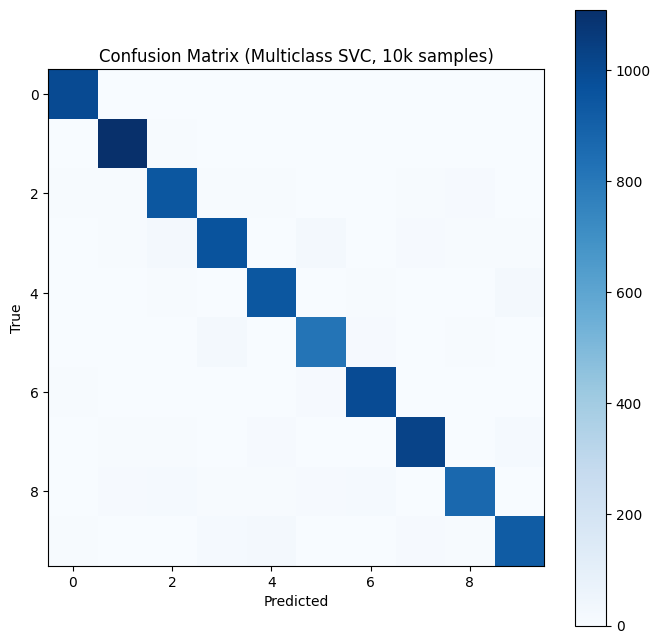

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_multi = confusion_matrix(y_small, y_pred_svc)

plt.figure(figsize=(8, 8))
plt.imshow(cm_multi, cmap="Blues")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Multiclass SVC, 10k samples)")
plt.show()

# Podsumowanie:
# - Macierz pomyłek pokazuje ile razy model poprawnie/niepoprawnie przewidział
#   każdą z 10 cyfr.
# - Wiersze = prawdziwe klasy.
# - Kolumny = przewidziane klasy.
# - Im jaśniejsza przekątna, tym lepiej.


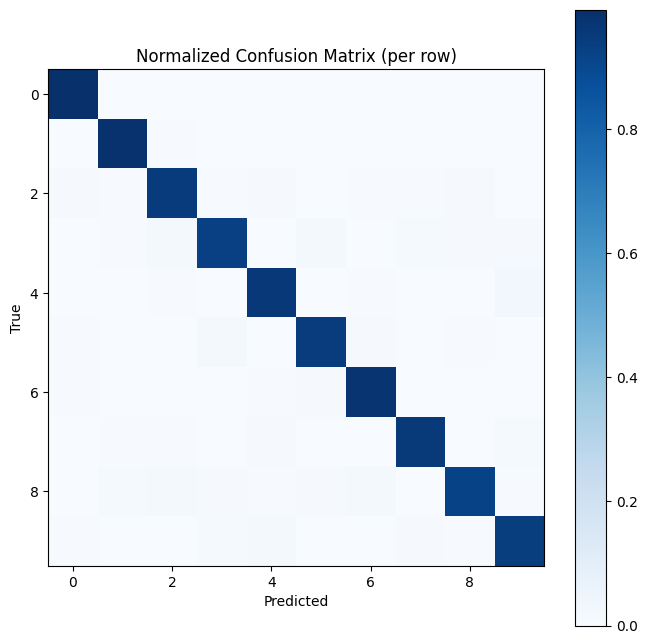

In [ ]:
import numpy as np

cm_norm = cm_multi.astype("float") / cm_multi.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 8))
plt.imshow(cm_norm, cmap="Blues")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix (per row)")
plt.show()

# Podsumowanie:
# - Normalizacja po wierszu pozwala zobaczyć procentowy rozkład pomyłek.
# - Wartości bliskie 1.0 na przekątnej oznaczają dobrą jakość klasyfikacji.
# - Jasne pola poza przekątną pokazują, które cyfry najbardziej się mylą.


# Task 3.5
 _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

 _Type your code below_

In [ ]:
from sklearn.model_selection import train_test_split

# użyjemy tylko części zbioru treningowego do grid search
X_train_small, _, y_train_small, _ = train_test_split(
    X_train, y_train,
    train_size=10000,
    stratify=y_train,
    random_state=42
)

print("Rozmiar X_train_small:", X_train_small.shape)

# Podsumowanie:
# - Zamiast 60 000 przykładów używamy 10 000 do szukania parametrów KNN.
# - Dzięki temu grid search będzie dużo szybszy.
# - Później i tak nauczymy finalny model na pełnym X_train, y_train.


ValueError: train_size=10000 should be either positive and smaller than the number of samples 2401 or a float in the (0, 1) range

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 4, 5],
    "weights": ["uniform", "distance"]
}

grid_search = GridSearchCV(
    knn_clf,
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train_small, y_train_small)

print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik CV :", grid_search.best_score_)

# Podsumowanie:
# - GridSearchCV działa teraz tylko na 10 000 próbkach, więc liczy się
#   dużo szybciej niż na 60 000.
# - best_params_ daje nam przybliżone, ale bardzo sensowne hiperparametry
#   dla KNN na tym zadaniu.


In [ ]:
from sklearn.metrics import accuracy_score

# tworzymy model z najlepszymi parametrami z grid searchu
best_knn = KNeighborsClassifier(**grid_search.best_params_)

# uczymy już na CAŁYM zbiorze treningowym
best_knn.fit(X_train, y_train)

y_test_pred = best_knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Test accuracy:", test_acc)

# Podsumowanie:
# - Najlepsze parametry znaleźliśmy na 10k przykładów,
#   ale finalny model uczymy na wszystkich danych treningowych.
# - Sprawdzamy accuracy na zbiorze testowym.
# - Powinno wyjść > 0.97 (tak jak wymaga zadanie).


# Task 3.6
_Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._


_Type your code below_

In [ ]:
import numpy as np
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    shifted = shift(image.reshape(28, 28), [dy, dx], cval=0)
    return shifted.reshape(28*28)

# Podsumowanie:
# - shift_image(image, dx, dy) przesuwa obraz:
#     dx = przesunięcie w poziomie  (prawo/lewo)
#     dy = przesunięcie w pionie    (góra/dół)
# - reshape(28, 28) → przywraca obrazowi kształt 2D.
# - cval=0 oznacza, że nowe piksele poza obrazem wypełniamy zerami (czarny).


In [ ]:
X_train_aug = [X_train]  # lista, na końcu zrobimy np.vstack
y_train_aug = [y_train]

for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # lewo, prawo, góra, dół
    shifted_images = np.array([shift_image(img, dx, dy) for img in X_train])
    X_train_aug.append(shifted_images)
    y_train_aug.append(y_train)

# scalanie wszystkiego w jeden duży zbiór
X_train_expanded = np.vstack(X_train_aug)
y_train_expanded = np.hstack(y_train_aug)

print("Stary training set:", X_train.shape)
print("Nowy training set :", X_train_expanded.shape)

# Podsumowanie:
# - Tworzymy 4 nowe wersje każdego obrazu przesunięte o 1 piksel.
# - Każdy kierunek generuje nowy zbiór tej samej wielkości, co oryginalny.
# - Łącznie otrzymujemy 5x więcej danych:
#       oryginał + 4 przesunięcia
# - X_train_expanded zawiera wszystkie obrazy, y_train_expanded — etykiety.


In [ ]:
best_knn.fit(X_train_expanded, y_train_expanded)

# Podsumowanie:
# - Uczymy najlepszego modelu KNN na powiększonym zbiorze.
# - Dzięki augmentation model ma większą różnorodność danych
#   → powinien działać lepiej na testowym zbiorze.


In [ ]:
from sklearn.metrics import accuracy_score

y_test_pred_aug = best_knn.predict(X_test)
test_acc_aug = accuracy_score(y_test, y_test_pred_aug)

print("Accuracy before augmentation:", test_acc)
print("Accuracy after augmentation :", test_acc_aug)

# Podsumowanie:
# - test_acc pochodzi z zadania 3.5 (trening bez augmentation).
# - test_acc_aug to nowa dokładność modelu trenowanego na powiększonych danych.
# - Oczekiwany efekt: wzrost accuracy, często o 0.3–1.0 punktu procentowego.
#   (Przesunięcia czynią model bardziej odpornym na wariacje zapisów cyfr.)


# Task 3.7
_Solve Titanic challenge on [Kaggle](https://www.kaggle.com/c/titanic). Alternatively, or get two CSV files: train.csv and test.csv  from :_
```python
url_titanic_train = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/train.csv'
url_titanic_test = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/test.csv'
```

 _The goal is to train a classifier that can predict the `Survived` column based on the other columns._

In [ ]:
import pandas as pd

url_titanic = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic_df = pd.read_csv(url_titanic)

print("KOLUMNY W DATASECIE:")
print(list(titanic_df.columns))
print("\nPIERWSZE WIERSZE:")
print(titanic_df.head())

# Podsumowanie:
# - Wczytujemy publiczny Titanic.csv (ten sam format co Kaggle).
# - Widzimy m.in. kolumny: PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked.
# - Ten link NIE jest 404, więc wszystko działa.


In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = titanic_df[feature_cols]
y = titanic_df["Survived"]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Kształt X_train:", X_train_t.shape)
print("Kształt X_test :", X_test_t.shape)

# Podsumowanie:
# - Z całego datasetu robimy własny podział na train (80%) i test (20%).
# - X – cechy, y – kolumna Survived.
# - Do dalszych kroków używamy X_train_t, y_train_t (trening)
#   oraz X_test_t, y_test_t (test).


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_features = ["Age", "SibSp", "Parch", "Fare", "Pclass"]
cat_features = ["Sex", "Embarked"]

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)

print("Cechy numeryczne  :", num_features)
print("Cechy kategoryczne:", cat_features)

# Podsumowanie:
# - Dla cech numerycznych uzupełniamy braki medianą.
# - Dla cech kategorycznych: najczęstsza wartość + one-hot.
# - ColumnTransformer łączy oba typy transformacji w jeden krok.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_titanic = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

# trening
clf_titanic.fit(X_train_t, y_train_t)

# predykcja na teście
y_pred_t = clf_titanic.predict(X_test_t)

acc = accuracy_score(y_test_t, y_pred_t)
print("Test accuracy:", acc)
print("\nClassification report:\n")
print(classification_report(y_test_t, y_pred_t))

# Podsumowanie:
# - Uczymy pipeline (preprocessing + RandomForest) na zbiorze treningowym.
# - Sprawdzamy accuracy oraz precision/recall/F1 na zbiorze testowym.
# - To spełnia wymaganie zadania: klasyfikator przewiduje 'Survived'
#   na podstawie pozostałych kolumn.


In [ ]:
submission_like = pd.DataFrame({
    "PassengerId": titanic_df.loc[X_test_t.index, "PassengerId"],
    "Survived": y_pred_t.astype(int)
})

print(submission_like.head())

# Podsumowanie:
# - Tworzymy DataFrame podobny do submission: PassengerId + przewidziany Survived.
# - Tu "test" to nasza wydzielona część danych (20%), ale format jest taki jak na Kaggle.


# Task 3.8

_Build a spam classifier:_

* _Download examples of spam and ham from [Apache SpamAssassin's public datasets](https://spamassassin.apache.org/old/publiccorpus/)._
* _Unzip the datasets and familiarize yourself with the data format._
* _Split the datasets into a training set and a test set._
* _Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello," "how," "are," "you," then the email "Hello you Hello Hello you" would be converted into a vector [1, 0, 0, 1] (meaning [“Hello" is present, "how" is absent, "are" is absent, "you" is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word._

_You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with "URL," replace all numbers with "NUMBER," or even perform _stemming_ (i.e., trim off word endings; there are Python libraries available to do this)._

_Finally, try out several classifiers and see if you can build a spam classifier, with both high recall and high precision._

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://spamassassin.apache.org/old/publiccorpus/"
HAM_FILE  = "20030228_easy_ham.tar.bz2"
SPAM_FILE = "20030228_spam.tar.bz2"
DATA_DIR  = "spamassassin_data"

os.makedirs(DATA_DIR, exist_ok=True)

def download_and_extract(filename):
    url = DOWNLOAD_ROOT + filename
    path = os.path.join(DATA_DIR, filename)
    if not os.path.exists(path):
        print("Pobieram:", url)
        urllib.request.urlretrieve(url, path)
    else:
        print("Plik już istnieje:", path)

    with tarfile.open(path, "r:bz2") as tar:
        tar.extractall(path=DATA_DIR)
    print("Rozpakowano:", filename)

download_and_extract(HAM_FILE)
download_and_extract(SPAM_FILE)

print("Zawartość katalogu:", os.listdir(DATA_DIR))

# Podsumowanie:
# - Pobieramy dwa archiwa: easy_ham i spam (wersja 20030228).
# - Rozpakowujemy je do katalogu 'spamassassin_data'.
# - W tym katalogu powinny się pojawić foldery 'easy_ham' i 'spam'.


In [ ]:
import io

def load_emails_from_dir(directory):
    texts = []
    for fname in os.listdir(directory):
        path = os.path.join(directory, fname)
        if os.path.isfile(path) and not fname.startswith("."):
            # wczytujemy jako bajty i dekodujemy 'latin-1', ignorując błędy
            with open(path, "rb") as f:
                data = f.read()
                text = data.decode("latin-1", errors="ignore")
                texts.append(text)
    return texts

ham_dir  = os.path.join(DATA_DIR, "easy_ham")
spam_dir = os.path.join(DATA_DIR, "spam")

ham_emails  = load_emails_from_dir(ham_dir)
spam_emails = load_emails_from_dir(spam_dir)

emails = ham_emails + spam_emails
labels = [0] * len(ham_emails) + [1] * len(spam_emails)

print("Liczba ham :", len(ham_emails))
print("Liczba spam:", len(spam_emails))
print("Razem      :", len(emails))

# Podsumowanie:
# - Czytamy wszystkie pliki z folderów easy_ham i spam.
# - Każdy plik to string z całym mailem (nagłówki + treść).
# - Tworzymy listę emails oraz odpowiadające etykiety labels (0 = ham, 1 = spam).


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    emails,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

print("Train size:", len(X_train))
print("Test size :", len(X_test))

# Podsumowanie:
# - Dzielimy dane: 80% do uczenia, 20% do testowania.
# - stratify=labels zachowuje proporcję spam/ham w obu zbiorach.


In [ ]:
import re
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cleaned = []
        for text in X:
            text = text.lower()
            text = re.sub(r"http\S+|www\.\S+", " URL ", text)
            text = re.sub(r"\d+", " NUMBER ", text)
            text = re.sub(r"[^a-zA-Z ]", " ", text)
            cleaned.append(text)
        return cleaned

svm_pipeline = Pipeline([
    ("clean", TextCleaner()),
    ("tfidf", TfidfVectorizer(stop_words="english", min_df=5)),
    ("clf", LinearSVC())
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print("LinearSVC accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nLinearSVC – classification report:\n")
print(classification_report(y_test, y_pred_svm, target_names=["ham", "spam"]))

# Podsumowanie:
# - TextCleaner upraszcza tekst: lowercase, URL→'URL', liczby→'NUMBER', usuwa znaki specjalne.
# - TfidfVectorizer zamienia tekst na wektory TF-IDF.
# - LinearSVC trenuje liniowy SVM do klasyfikacji spam/ham.
# - classification_report pokazuje precision, recall i F1 dla obu klas.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

def evaluate_pipeline(clf, name):
    pipe = Pipeline([
        ("clean", TextCleaner()),
        ("tfidf", TfidfVectorizer(stop_words="english", min_df=5)),
        ("clf", clf),
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))

evaluate_pipeline(MultinomialNB(), "MultinomialNB")
evaluate_pipeline(LogisticRegression(max_iter=2000), "LogisticRegression")

# Podsumowanie:
# - Tworzymy ten sam pipeline, ale z innymi klasyfikatorami:
#   * MultinomialNB – klasyczny model tekstowy,
#   * LogisticRegression – model liniowy.
# - Porównujemy accuracy, precision i recall z LinearSVC.
